In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import matplotlib.dates as mdates
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [198]:
df=pd.read_csv("C:/Users/hp compac/Downloads/train.csv")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [199]:
df.shape

(9800, 18)

In [200]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [202]:
df.describe(include="all")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.000000,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.000000,9800,9800,9800,9800,9800,9800.000000
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.322403,NaN,NaN,NaN,NaN,NaN,230.769059
std,2829.160653,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.223413,NaN,NaN,NaN,NaN,NaN,626.651875
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000
25%,2450.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,NaN,NaN,17.248000
50%,4900.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.000000,NaN,NaN,NaN,NaN,NaN,54.490000
75%,7350.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,NaN,NaN,210.605000


In [203]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [204]:
df.drop(["Row ID","Postal Code"],axis=1,inplace=True)

In [205]:
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")
df["Ship Date"] = pd.to_datetime(df["Ship Date"], errors="coerce")

In [206]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [207]:
df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [208]:
df.duplicated().sum()

1

In [209]:
df.drop_duplicates(inplace=True)

In [210]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
z_scores = np.abs(zscore(df[numeric_columns]))
threshold = 3
outliers = z_scores > threshold
outliers_count = outliers.sum(axis=0)
print(outliers_count)

Sales    123
dtype: int64


In [211]:
df_cleaned = df[~outliers.any(axis=1)]

In [212]:
df_cleaned

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,NaT,NaT,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,2016-12-01,NaT,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [213]:
for col in df_cleaned.select_dtypes(include=["object"]).columns:
    print(df[col].value_counts())
    print('----------------------------')

Order ID
CA-2018-100111    14
CA-2018-157987    12
US-2017-108504    11
CA-2017-165330    11
CA-2016-131338    10
                  ..
US-2016-110261     1
CA-2016-125710     1
US-2016-137960     1
CA-2016-124975     1
CA-2016-142202     1
Name: count, Length: 4922, dtype: int64
----------------------------
Ship Mode
Standard Class    5858
Second Class      1902
First Class       1501
Same Day           538
Name: count, dtype: int64
----------------------------
Customer ID
WB-21850    35
MA-17560    34
PP-18955    34
JL-15835    33
CK-12205    32
            ..
JR-15700     1
CJ-11875     1
SC-20845     1
RE-19405     1
AO-10810     1
Name: count, Length: 793, dtype: int64
----------------------------
Customer Name
William Brown          35
Matt Abelman           34
Paul Prost             34
John Lee               33
Chloris Kastensmidt    32
                       ..
Jocasta Rupert          1
Carl Jackson            1
Sung Chung              1
Ricardo Emerson         1
Anthony O'Donne

In [214]:
df_cleaned.describe(include="all")


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9676,3918,3776,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676,9676.000000
unique,4898,NaN,NaN,4,793,793,3,1,529,49,4,1845,3,17,1833,NaN
top,CA-2018-157987,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,12,NaN,NaN,5787,35,35,5041,9676,868,1923,3105,19,5880,1474,47,NaN
mean,NaN,2017-03-14 13:08:43.736600320,2017-04-09 16:37:37.627118848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,181.513642
min,NaN,2015-01-02 00:00:00,2015-01-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000
25%,NaN,2016-04-05 00:00:00,2016-04-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.990000
50%,NaN,2017-05-02 00:00:00,2017-06-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.168000
75%,NaN,2018-03-07 00:00:00,2018-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.980000
max,NaN,2018-12-11 00:00:00,2019-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2104.550000


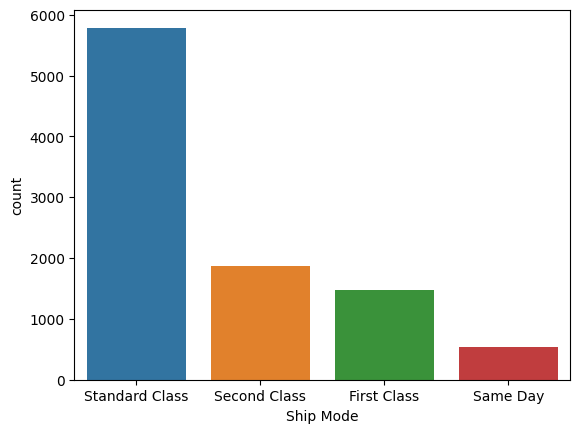

In [215]:
sns.countplot(data=df_cleaned,x="Ship Mode",order=df_cleaned["Ship Mode"].value_counts().index)
plt.show()

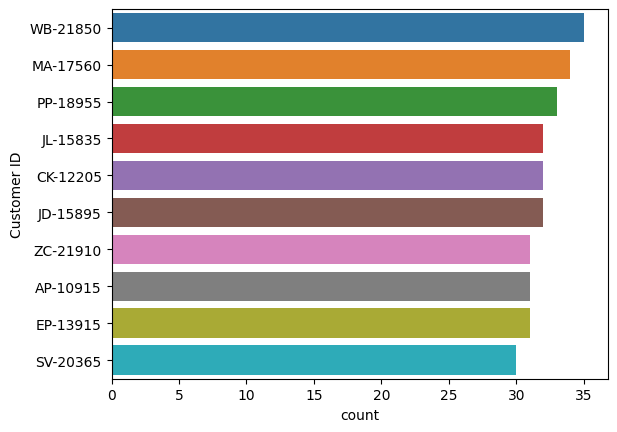

In [216]:
sns.countplot(data=df_cleaned,y="Customer ID",order=df_cleaned["Customer ID"].value_counts().index[:10])
plt.show()

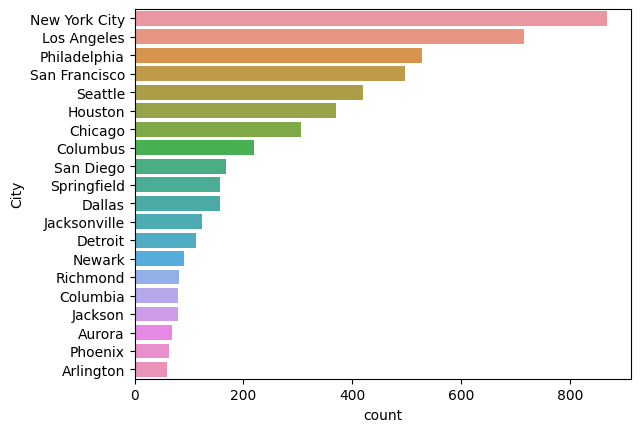

In [217]:
sns.countplot(data=df_cleaned,y="City",order=df_cleaned["City"].value_counts().index[:20])
plt.show()

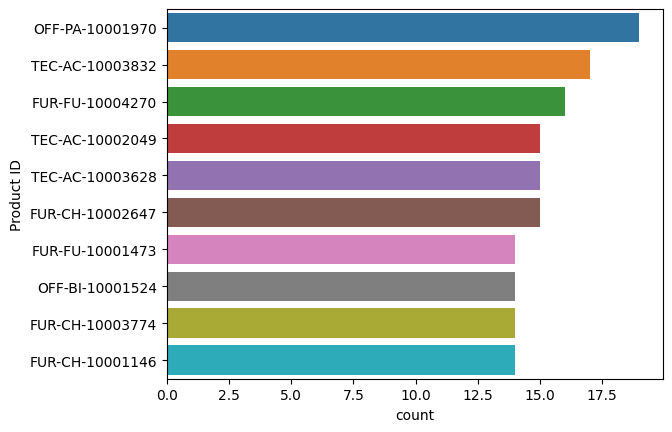

In [218]:
sns.countplot(data=df_cleaned,y="Product ID",order=df_cleaned["Product ID"].value_counts().index[:10])
plt.show()

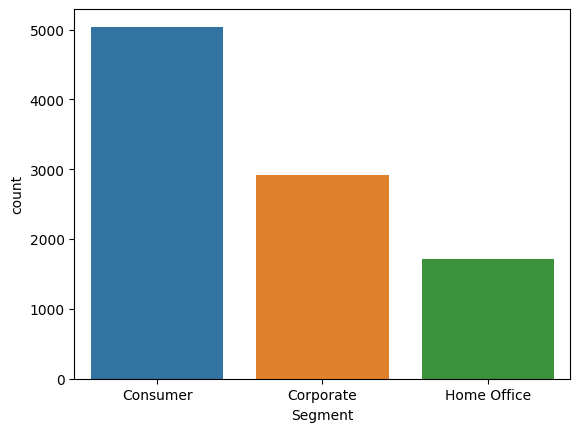

In [219]:
sns.countplot(data=df_cleaned,x="Segment",order=df_cleaned["Segment"].value_counts().index)
plt.show()

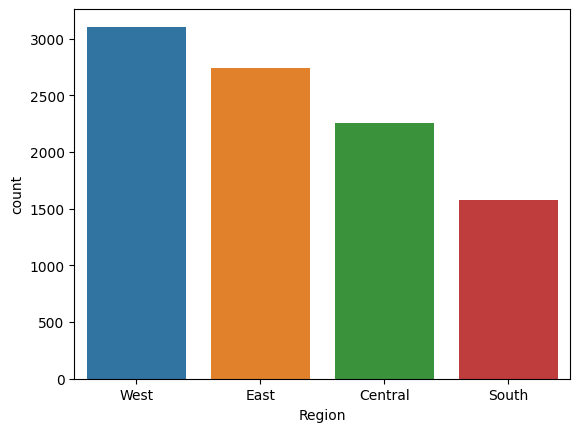

In [220]:
sns.countplot(data=df_cleaned,x="Region",order=df_cleaned["Region"].value_counts().index)
plt.show()

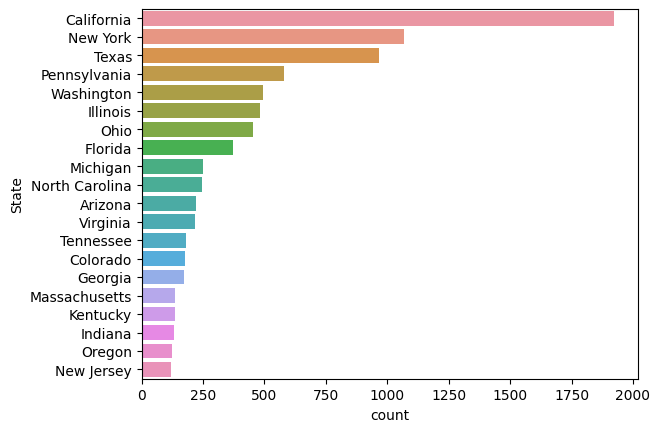

In [221]:
sns.countplot(data=df_cleaned,y="State",order=df_cleaned["State"].value_counts().index[:20])
plt.show()

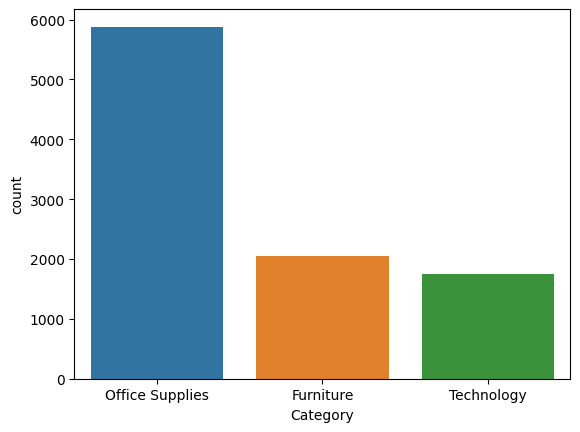

In [222]:
sns.countplot(data=df_cleaned,x="Category",order=df_cleaned["Category"].value_counts().index)
plt.show()

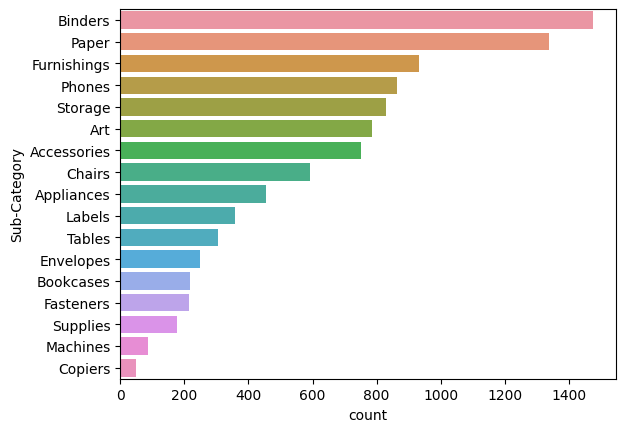

In [223]:
sns.countplot(data=df_cleaned,y="Sub-Category",order=df_cleaned["Sub-Category"].value_counts().index)
plt.show()

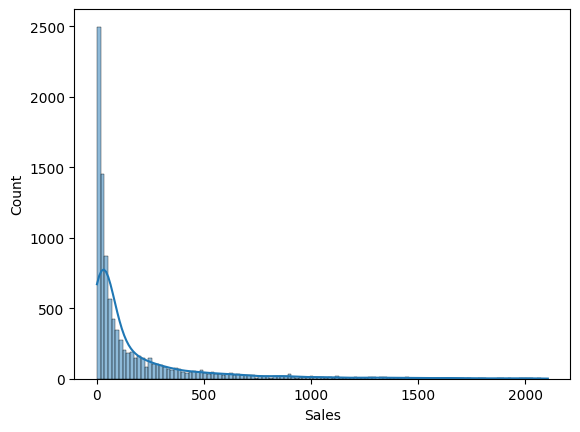

In [224]:
sns.histplot(df_cleaned["Sales"],kde=True)
plt.show()

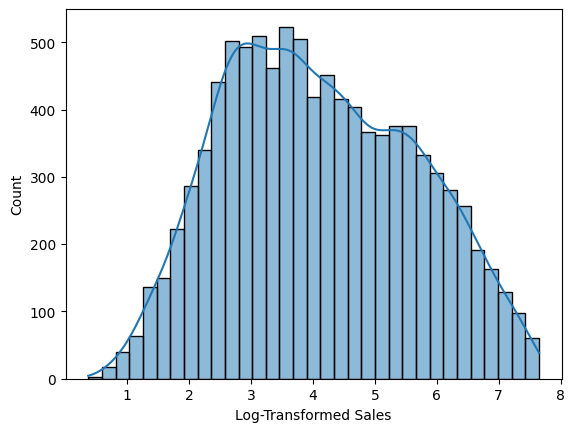

In [225]:
sns.histplot(np.log1p(df_cleaned["Sales"]), kde=True)
plt.xlabel("Log-Transformed Sales")
plt.show()


In [226]:
df_cleaned["Sales_log"] = np.log1p(df_cleaned["Sales"])

C:\Users\hp compac\AppData\Local\Temp\ipykernel_12976\862338734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["Sales_log"] = np.log1p(df_cleaned["Sales"])


In [227]:
df_cleaned.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Sales_log
0,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,5.572002
1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,6.597064
2,CA-2017-138688,2017-12-06,NaT,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.748552
3,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,6.865450
4,US-2016-108966,2016-11-10,NaT,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,3.151368


In [228]:
sales_ts = df_cleaned.groupby('Order Date')['Sales_log'].sum().reset_index()

In [229]:
sales_ts.head()

,Order Date,Sales_log
0,2015-01-02,6.152520
1,2015-01-03,46.220904
2,2015-01-04,12.514789
3,2015-01-06,55.795903
4,2015-01-07,11.220375


In [230]:
sales_ts = sales_ts.set_index('Order Date').resample('M').sum()
sales_ts.head()

,Sales_log
Order Date,
2015-01-31,294.956941
2015-02-28,264.443202
2015-03-31,201.554392
2015-04-30,236.628906
2015-05-31,303.175559


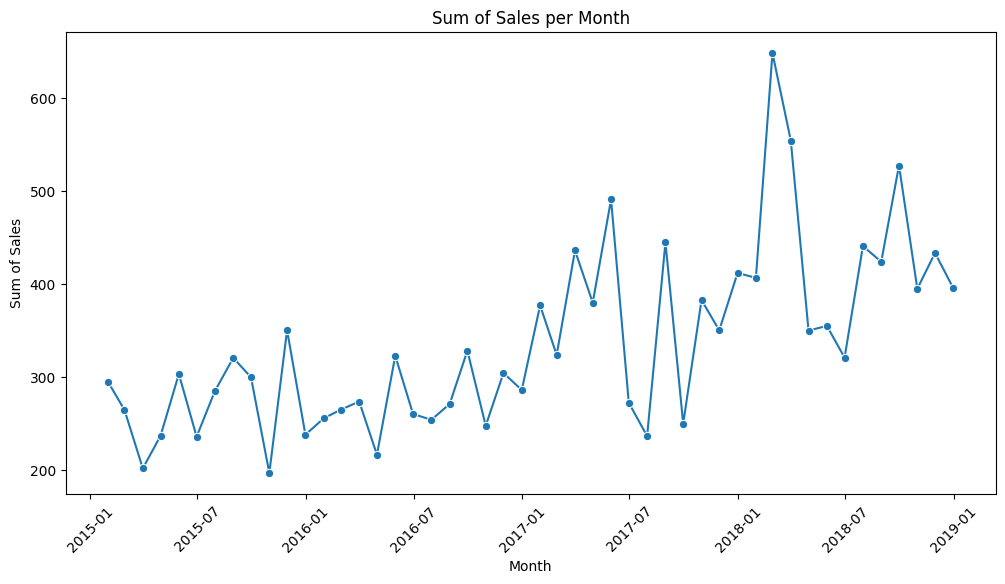

In [231]:
plt.figure(figsize=(12, 6)) 
sns.lineplot(data=sales_ts,x="Order Date",y="Sales_log",marker="o")
plt.xlabel("Month")
plt.ylabel("Sum of Sales")
plt.title("Sum of Sales per Month")
plt.xticks(rotation=45)
plt.show()

In [232]:
sales_ts['year'] = sales_ts.index.year
sales_ts['month'] = sales_ts.index.month
sales_ts['dayofweek'] = sales_ts.index.dayofweek

In [233]:
sales_ts.head()

,Sales_log,year,month,dayofweek
Order Date,,,,
2015-01-31,294.956941,2015,1,5
2015-02-28,264.443202,2015,2,5
2015-03-31,201.554392,2015,3,1
2015-04-30,236.628906,2015,4,3
2015-05-31,303.175559,2015,5,6


In [234]:
sales_ts['lag1'] = sales_ts['Sales_log'].shift(1)
sales_ts['lag2'] = sales_ts['Sales_log'].shift(2)
sales_ts['rolling_mean_3'] = sales_ts['Sales_log'].shift(1).rolling(window=3).mean()

In [235]:
sales_ts.head()

,Sales_log,year,month,dayofweek,lag1,lag2,rolling_mean_3
Order Date,,,,,,,
2015-01-31,294.956941,2015,1,5,NaN,NaN,NaN
2015-02-28,264.443202,2015,2,5,294.956941,NaN,NaN
2015-03-31,201.554392,2015,3,1,264.443202,294.956941,NaN
2015-04-30,236.628906,2015,4,3,201.554392,264.443202,253.651512
2015-05-31,303.175559,2015,5,6,236.628906,201.554392,234.208833


In [236]:
sales_ts.shape

(48, 7)

In [237]:
X = sales_ts.drop('Sales_log', axis=1)
y = sales_ts['Sales_log']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)


(36, 6)
(12, 6)


In [239]:
model = xgb.XGBRegressor()

In [240]:
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [241]:
y_pred = model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 96.45092476811449


In [242]:
y_pred

array([306.0772 , 493.5042 , 323.52594, 343.76852, 229.52936, 488.71802,
       303.45306, 307.55945, 289.3852 , 239.90659, 220.40074, 294.08447],
      dtype=float32)

In [243]:
y_test

Order Date
2017-04-30    379.963927
2018-05-31    354.944560
2017-03-31    436.234476
2018-08-31    424.024804
2017-01-31    377.004992
2018-02-28    648.839236
2016-01-31    255.468565
2016-08-31    270.849075
2015-05-31    303.175559
2017-02-28    323.705011
2015-09-30    299.644282
2015-04-30    236.628906
Name: Sales_log, dtype: float64

In [244]:
mape = (abs((y_test - y_pred) / y_test)).mean() * 100
print("MAPE:", mape, "%")

MAPE: 23.378488061244322 %


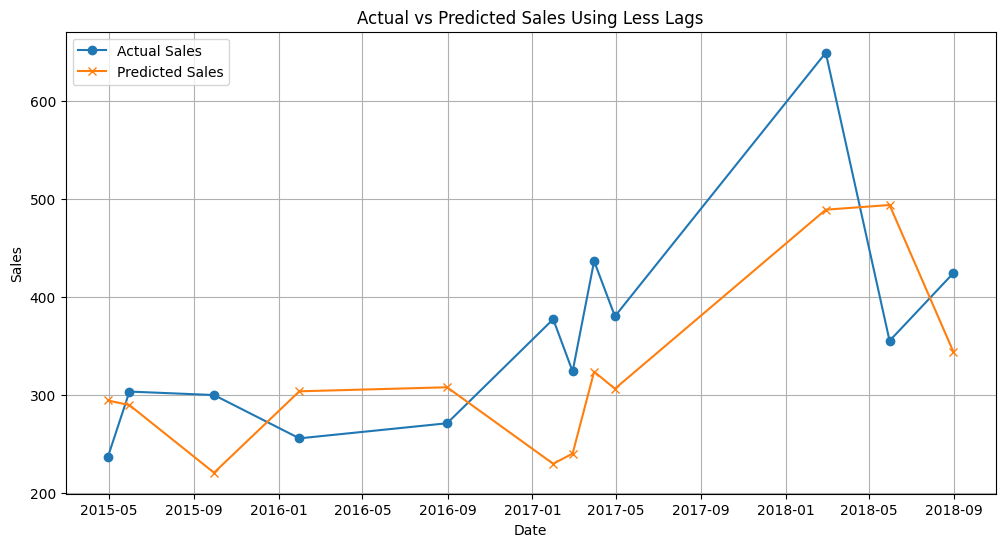

In [245]:
# Put actual & predicted into one DataFrame
plot_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}, index=y_test.index)

# Sort by Date (important!)
plot_df = plot_df.sort_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(plot_df.index, plot_df["Actual"], label="Actual Sales", marker="o")
plt.plot(plot_df.index, plot_df["Predicted"], label="Predicted Sales", marker="x")

plt.title("Actual vs Predicted Sales Using Less Lags")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


<h2>Using more lags</h2>

In [246]:
for lag in [3,6,12]:
    sales_ts[f'lag_{lag}'] = sales_ts['Sales_log'].shift(lag)

sales_ts['rolling_mean_6'] = sales_ts['Sales_log'].shift(1).rolling(6).mean()
sales_ts['rolling_mean_12'] = sales_ts['Sales_log'].shift(1).rolling(12).mean()

In [247]:
sales_ts.head()

,Sales_log,year,month,dayofweek,lag1,lag2,rolling_mean_3,lag_3,lag_6,lag_12,rolling_mean_6,rolling_mean_12
Order Date,,,,,,,,,,,,
2015-01-31,294.956941,2015,1,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-28,264.443202,2015,2,5,294.956941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-31,201.554392,2015,3,1,264.443202,294.956941,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-30,236.628906,2015,4,3,201.554392,264.443202,253.651512,294.956941,NaN,NaN,NaN,NaN
2015-05-31,303.175559,2015,5,6,236.628906,201.554392,234.208833,264.443202,NaN,NaN,NaN,NaN


In [248]:
X = sales_ts.drop('Sales_log', axis=1)
y = sales_ts['Sales_log']

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)


(36, 11)
(12, 11)


In [250]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [251]:
y_pred = model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 66.89527789192162


In [252]:
mape = (abs((y_test - y_pred) / y_test)).mean() * 100
print("MAPE:", mape, "%")

MAPE: 14.423382822973277 %


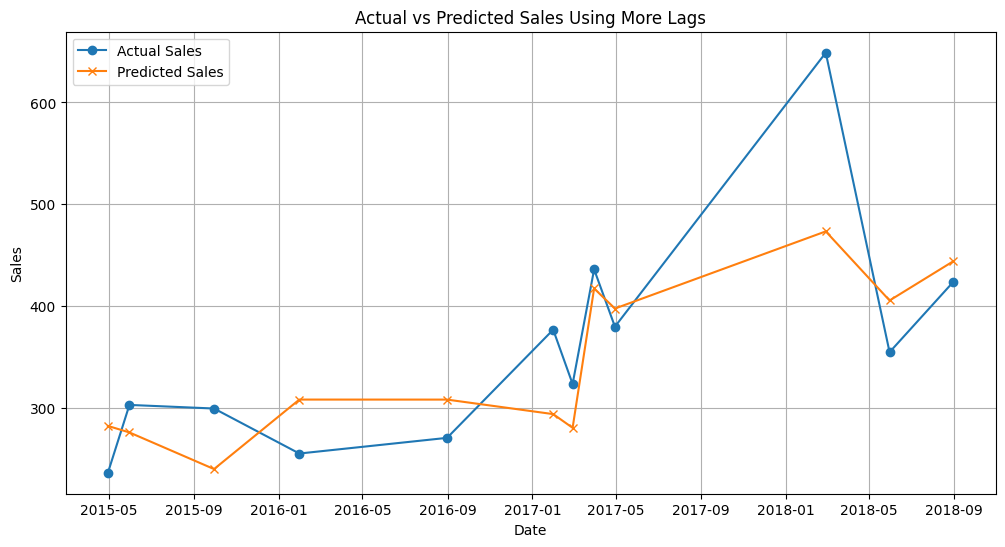

In [253]:
# Put actual & predicted into one DataFrame
plot_df = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
}, index=y_test.index)

# Sort by Date (important!)
plot_df = plot_df.sort_index()

# Plot
plt.figure(figsize=(12,6))
plt.plot(plot_df.index, plot_df["Actual"], label="Actual Sales", marker="o")
plt.plot(plot_df.index, plot_df["Predicted"], label="Predicted Sales", marker="x")

plt.title("Actual vs Predicted Sales Using More Lags")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()
